# Supply Chain Data Analytics  
### Supply chain analytics plays a crucial role in making informed decisions driven by data across diverse sectors, including manufacturing, retail, healthcare, and logistics. This involves the systematic gathering, examination, and interpretation of data associated with the flow of goods and services from suppliers to customers.

### In this project, our emphasis will be on addressing one of the real-world challenges typically addressed through supply chain data: 

### 1) Identifying fraudulent orders - 
#### In the realm of supply chain analytics, a crucial application is the identification of fraudulent orders. Leveraging advanced data analytics and machine learning techniques, businesses can scrutinize patterns, anomalies, and behavioral indicators to accurately pinpoint potentially fraudulent transactions within the supply chain. This proactive approach not only safeguards the financial integrity of the organization but also fortifies the overall security and reliability of the supply chain network, ensuring a resilient and trustworthy business ecosystem.

##### References - https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data


In [1]:
# Importing Libraries required

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
import datetime as dt

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
supply_data=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin-1')
print(supply_data.shape)
supply_data.head()

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
supply_data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Deleting duplicate and irrelevant features

In [4]:
data=supply_data.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

supply_data_f=supply_data[FeatureList]
print(supply_data_f.shape)
supply_data_f.head()

(180519, 44)


,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data Visualization

### To grasp the patterns and nuances within the dataset, aiding in feature selection, identifying outliers, and making informed decisions about preprocessing, ultimately laying the groundwork for a more effective and accurate model

# Order / delivery status

In [5]:
data_order_status=supply_data_f.groupby(['Order Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_order_status['Order Status'] , y=data_order_status['Number of Orders']  , color=data_order_status['Number of Orders'],color_continuous_scale='Viridis',
      labels = { 'Order Status': 'Order Status', 'Number of Orders': 'Number of Orders'})

#### Will use order status to flag fraudulent  orders

In [6]:
data_delivery_status=supply_data_f.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],color_continuous_scale='Viridis',
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [7]:
#Product and deliveray status
df_sales_pd=supply_data_f.groupby([ 'Order Status', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd, x='Sales of Orders',y = 'Order Status',color ='Delivery Status')


#### Delivery status could be one of the most important feature directly related to fraudulent flag. Exploring other features that could be highly relevant for the model to identify fraudulent orders or predict sales

## Customers & quanitity of orders

In [8]:
supply_data_f['Customer_ID_STR']=supply_data_f['Customer Id'].astype(str)

data_customers=supply_data_f.groupby(['Customer_ID_STR','Order Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
data_customers[data_customers['Order Status']=='SUSPECTED_FRAUD'].head()

,Customer_ID_STR,Order Status,Number of Orders
5463,11584,SUSPECTED_FRAUD,12
46413,9819,SUSPECTED_FRAUD,10
43629,9010,SUSPECTED_FRAUD,10
43603,9002,SUSPECTED_FRAUD,10
3522,11021,SUSPECTED_FRAUD,9


# Customer Segment

In [9]:
#Customer Segments
data_Customer_Segment=supply_data_f.groupby(['Customer Segment','Order Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment[data_Customer_Segment['Order Status']=='SUSPECTED_FRAUD'], values='Number of Orders', names= 'Customer Segment' , title= 'Fraudulent Orders by Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

#### Majority frauds are from Consumer segments

# Category

In [10]:
#Category Name
data_Category_Name=supply_data_f.groupby(['Category Name','Order Status'])['Order Id'].count().reset_index(name='Number of Fraudulent Orders').sort_values(by= 'Number of Fraudulent Orders', ascending= True)
px.bar(data_Category_Name[data_Category_Name['Order Status']=='SUSPECTED_FRAUD'], x='Number of Fraudulent Orders',y = 'Category Name',color ='Number of Fraudulent Orders')

#### Footwear, Games, water sports, cardio equipment and electronics are the top suspected fraudulent orders 

# Geographical distribution of Fraudulent orders

In [11]:
data_Region=supply_data_f.groupby(['Order Region','Order Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region[data_Region['Order Status']=='SUSPECTED_FRAUD'], x='Number of Orders',y = 'Order Region',color ='Number of Orders')


In [12]:
data_countries=supply_data_f.groupby(['Order Country','Order Status'])['Order Id'].count().reset_index(name='Number of Fraudulent Orders').sort_values(by= 'Number of Fraudulent Orders', ascending= True)
px.bar(data_countries[data_countries['Order Status']=='SUSPECTED_FRAUD'], x='Number of Fraudulent Orders',y = 'Order Country',color ='Number of Fraudulent Orders')


In [13]:
df_geo=supply_data_f.groupby(['Order Country','Order Status'])['Order Id'].count().reset_index(name='Number of Fraudulent Orders').sort_values(by= 'Number of Fraudulent Orders', ascending= True)
fig = px.choropleth(df_geo[df_geo['Order Status']=='SUSPECTED_FRAUD'] ,  locationmode='country names', locations='Order Country',
                    color='Number of Fraudulent Orders', 
                    hover_name='Order Country', 
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

# Date and sales analysis

In [14]:
data_orderdate=supply_data_f[['order date (DateOrders)', 'Order Id','Order Status']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

In [15]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

In [16]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr','Order Status'])['Order Id'].count().reset_index(name='Fraudulent Orders').sort_values(by= 'Fraudulent Orders', ascending= False)
px.bar(df_sales_year[df_sales_year['Order Status']=='SUSPECTED_FRAUD'], x='Fraudulent Orders',y = 'YearStr',color ='Fraudulent Orders')


#### Fraudulent order are slightly lower in 2017 compared to 2018,2019. Very low in 2018, as data is available only for January month. Consistent number of fraudulent orders ~1400 can be seen yearly, meaning ~4 fraudulent orders everyday.

# 1) Identifying fraudulent orders

Predicting if an order is fraud or not

### Data Pre-Processing

In [17]:
data=supply_data_f.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

#### Suspected_Fraud is the target variable and remaining others are features

In [18]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [19]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

we can consider NaN values as a separte class using LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features = features.apply(le.fit_transform)

In [21]:
features.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
0,1,18934,2568,0,0,40,66,1,20649,0,36,7,4,3624,4420,3,331,70,20649,5961,65749,114,426,4,180516,62,140,0,166,2568,18934,15,475,609,114,47,0,78,78,62,0,27149,3,11912
1,3,2272,2559,1,1,40,66,1,19386,0,36,7,4,5522,4419,3,391,69,19386,1147,64486,114,498,5,179253,62,44,0,166,2559,2272,13,841,609,114,47,0,78,78,62,0,2209,3,10509
2,0,2293,2555,3,0,40,452,0,19385,0,5,941,4,9146,232,3,391,69,19385,1146,64485,114,529,6,179252,62,44,0,166,2555,2293,13,841,609,114,47,0,78,78,62,0,1980,3,10508
3,1,13638,2546,0,0,40,285,0,19384,2,5,720,4,8467,663,3,3226,8,19384,1145,64484,114,600,7,179251,62,119,0,166,2546,13638,11,835,609,114,47,0,78,78,62,0,1752,3,10507
4,2,20599,2526,0,0,40,66,1,19383,1,36,7,4,3783,4421,3,3226,8,19383,1144,64483,114,682,8,179250,62,156,0,166,2526,20599,11,835,609,114,47,0,78,78,62,0,1528,3,10505


In [22]:
# Finding features that are highly correlated with each other and dropping them to avoid multi-collinearity

In [23]:
# calculating the correlation matrix
correlation_matrix = features.corr().abs()
correlation_matrix

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
Type,1.000000,0.002719,0.004189,0.045581,0.061529,0.002256,0.009135,0.005928,0.000971,0.000613,0.002421,0.006099,0.000598,0.003222,0.007314,0.001964,0.006535,0.004716,0.000971,0.003634,0.005601,0.000680,0.000766,0.001415,0.005823,0.001133,0.002192,0.002664,0.004036,0.004189,0.002719,0.001376,0.006733,0.007283,0.000680,0.000123,NaN,0.001838,0.001838,0.001133,NaN,0.002886,0.000030,0.000944
Benefit per order,0.002719,1.000000,0.288113,0.001451,0.003116,0.103552,0.003204,0.002102,0.004280,0.003413,0.002960,0.002441,0.008420,0.002561,0.002680,0.008833,0.001933,0.005401,0.004280,0.005718,0.015398,0.077661,0.125583,0.038287,0.015619,0.193278,0.887072,0.053416,0.284809,0.288113,1.000000,0.004049,0.005313,0.000435,0.077661,0.065918,NaN,0.121365,0.121365,0.193278,NaN,0.004233,0.001903,0.003479
Sales per customer,0.004189,0.288113,1.000000,0.000084,0.002991,0.302159,0.000766,0.000780,0.009194,0.004592,0.002343,0.001559,0.074215,0.000248,0.001034,0.030500,0.003224,0.004862,0.009194,0.016715,0.028737,0.239272,0.451119,0.116077,0.030719,0.651830,0.000667,0.215258,0.992145,1.000000,0.288113,0.010553,0.012511,0.008296,0.239272,0.197153,NaN,0.377387,0.377387,0.651830,NaN,0.015072,0.000410,0.007401
Delivery Status,0.045581,0.001451,0.000084,1.000000,0.190507,0.000684,0.000676,0.003267,0.000009,0.002875,0.000311,0.001530,0.007667,0.002808,0.000709,0.003374,0.000831,0.001389,0.000009,0.003682,0.004621,0.000771,0.000797,0.001122,0.004687,0.001803,0.001888,0.002674,0.000019,0.000084,0.001451,0.001368,0.007364,0.002082,0.000771,0.000905,NaN,0.000711,0.000711,0.001803,NaN,0.003435,0.081300,0.000596
Late_delivery_risk,0.061529,0.003116,0.002991,0.190507,1.000000,0.001361,0.005082,0.001044,0.001482,0.001419,0.001839,0.003037,0.002356,0.000607,0.003641,0.000578,0.003838,0.001649,0.001482,0.003152,0.001263,0.001406,0.001974,0.000377,0.001376,0.001940,0.001792,0.000139,0.003036,0.002991,0.003116,0.006159,0.001223,0.004283,0.001406,0.001722,NaN,0.003992,0.003992,0.001940,NaN,0.004439,0.401375,0.007616
Category Name,0.002256,0.103552,0.302159,0.000684,0.001361,1.000000,0.004669,0.000666,0.004568,0.000019,0.003215,0.001350,0.216530,0.000041,0.001572,0.020256,0.002315,0.002435,0.004568,0.012459,0.007328,0.045560,0.174507,0.000843,0.005015,0.197566,0.001201,0.030593,0.289388,0.302159,0.103552,0.011948,0.006086,0.002753,0.045560,0.114744,NaN,0.253764,0.253764,0.197566,NaN,0.015469,0.002616,0.018895
Customer City,0.009135,0.003204,0.000766,0.000676,0.005082,0.004669,1.000000,0.587896,0.005059,0.011156,0.407381,0.484445,0.002320,0.486300,0.477871,0.004767,0.003531,0.001824,0.005059,0.006767,0.005503,0.000013,0.000303,0.000105,0.005618,0.000860,0.001230,0.001140,0.000670,0.000766,0.003204,0.002795,0.002517,0.004453,0.000013,0.000043,NaN,0.002594,0.002594,0.000860,NaN,0.007189,0.003250,0.007875
Customer Country,0.005928,0.002102,0.000780,0.003267,0.001044,0.000666,0.587896,1.000000,0.007086,0.011621,0.596156,0.746659,0.003548,0.853820,0.709375,0.002206,0.004460,0.000164,0.007086,0.007253,0.004089,0.001546,0.002486,0.002763,0.004157,0.000681,0.002000,0.002769,0.001304,0.000780,0.002102,0.000580,0.004149,0.001949,0.001546,0.001383,NaN,0.001794,0.001794,0.000681,NaN,0.007000,0.001570,0.008020
Customer Id,0.000971,0.004280,0.009194,0.000009,0.001482,0.004568,0.005059,0.007086

In [24]:
# Set the upper triangle of the correlation matrix to NaN to ignore self-correlation and duplicates
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
upper_triangle

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR
Type,NaN,0.002719,0.004189,0.045581,0.061529,0.002256,0.009135,0.005928,0.000971,0.000613,0.002421,0.006099,0.000598,0.003222,0.007314,0.001964,0.006535,0.004716,0.000971,0.003634,0.005601,0.000680,0.000766,0.001415,0.005823,0.001133,0.002192,0.002664,0.004036,0.004189,0.002719,0.001376,0.006733,0.007283,0.000680,0.000123,NaN,0.001838,0.001838,0.001133,NaN,0.002886,0.000030,0.000944
Benefit per order,NaN,NaN,0.288113,0.001451,0.003116,0.103552,0.003204,0.002102,0.004280,0.003413,0.002960,0.002441,0.008420,0.002561,0.002680,0.008833,0.001933,0.005401,0.004280,0.005718,0.015398,0.077661,0.125583,0.038287,0.015619,0.193278,0.887072,0.053416,0.284809,0.288113,1.000000,0.004049,0.005313,0.000435,0.077661,0.065918,NaN,0.121365,0.121365,0.193278,NaN,0.004233,0.001903,0.003479
Sales per customer,NaN,NaN,NaN,0.000084,0.002991,0.302159,0.000766,0.000780,0.009194,0.004592,0.002343,0.001559,0.074215,0.000248,0.001034,0.030500,0.003224,0.004862,0.009194,0.016715,0.028737,0.239272,0.451119,0.116077,0.030719,0.651830,0.000667,0.215258,0.992145,1.000000,0.288113,0.010553,0.012511,0.008296,0.239272,0.197153,NaN,0.377387,0.377387,0.651830,NaN,0.015072,0.000410,0.007401
Delivery Status,NaN,NaN,NaN,NaN,0.190507,0.000684,0.000676,0.003267,0.000009,0.002875,0.000311,0.001530,0.007667,0.002808,0.000709,0.003374,0.000831,0.001389,0.000009,0.003682,0.004621,0.000771,0.000797,0.001122,0.004687,0.001803,0.001888,0.002674,0.000019,0.000084,0.001451,0.001368,0.007364,0.002082,0.000771,0.000905,NaN,0.000711,0.000711,0.001803,NaN,0.003435,0.081300,0.000596
Late_delivery_risk,NaN,NaN,NaN,NaN,NaN,0.001361,0.005082,0.001044,0.001482,0.001419,0.001839,0.003037,0.002356,0.000607,0.003641,0.000578,0.003838,0.001649,0.001482,0.003152,0.001263,0.001406,0.001974,0.000377,0.001376,0.001940,0.001792,0.000139,0.003036,0.002991,0.003116,0.006159,0.001223,0.004283,0.001406,0.001722,NaN,0.003992,0.003992,0.001940,NaN,0.004439,0.401375,0.007616
Category Name,NaN,NaN,NaN,NaN,NaN,NaN,0.004669,0.000666,0.004568,0.000019,0.003215,0.001350,0.216530,0.000041,0.001572,0.020256,0.002315,0.002435,0.004568,0.012459,0.007328,0.045560,0.174507,0.000843,0.005015,0.197566,0.001201,0.030593,0.289388,0.302159,0.103552,0.011948,0.006086,0.002753,0.045560,0.114744,NaN,0.253764,0.253764,0.197566,NaN,0.015469,0.002616,0.018895
Customer City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587896,0.005059,0.011156,0.407381,0.484445,0.002320,0.486300,0.477871,0.004767,0.003531,0.001824,0.005059,0.006767,0.005503,0.000013,0.000303,0.000105,0.005618,0.000860,0.001230,0.001140,0.000670,0.000766,0.003204,0.002795,0.002517,0.004453,0.000013,0.000043,NaN,0.002594,0.002594,0.000860,NaN,0.007189,0.003250,0.007875
Customer Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007086,0.011621,0.596156,0.746659,0.003548,0.853820,0.709375,0.002206,0.004460,0.000164,0.007086,0.007253,0.004089,0.001546,0.002486,0.002763,0.004157,0.000681,0.002000,0.002769,0.001304,0.000780,0.002102,0.000580,0.004149,0.001949,0.001546,0.001383,NaN,0.001794,0.001794,0.000681,NaN,0.007000,0.001570,0.008020
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003587,0.002579,0.003998,0.021639,0.003723,0.002082,0.049499,0.004641,0.036952,1.000000,0.137634,0.209359,0.174500,0.000244,0.001799,0.192126,0.058816,0.000293,0.091470,0.010537,0.009194,0.004280,0.017203,0.015712

In [25]:
# Find features with correlation above a certain threshold (e.g., 0.8)
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop the highly correlated features
features1 = features.drop(highly_correlated_features, axis=1)

#### Omittiing all features that have less than +-0.004 correlation with target

In [26]:
data1=pd.concat([features1,target],axis=1)
correlation_with_target = data1.corr()['SUSPECTED_FRAUD'].abs()
# Filter out features with correlation less than the threshold
selected_features = correlation_with_target[(correlation_with_target >= 0.004) | (correlation_with_target <= -0.004)].index
# Create a DataFrame with only the selected features
new_features = data1[selected_features]

In [27]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(features, target)
feature_p_values = pd.DataFrame({'Feature': features.columns, 'P-Value': selector.pvalues_})
feature_p_values = feature_p_values.sort_values(by='P-Value')
selected_features = feature_p_values[feature_p_values['P-Value'] <= 0.05]['Feature']
f_reg_results=features[selected_features]


In [28]:
f_reg_results.columns.to_list()

['Type',
 'Delivery Status',
 'Late_delivery_risk',
 'Order Customer Id',
 'Customer Id',
 'Order Region',
 'Customer Country',
 'Order State',
 'Customer Segment',
 'Order City',
 'Customer State',
 'Customer Zipcode',
 'Longitude',
 'Order Country',
 'Latitude',
 'Order Zipcode',
 'Shipping Mode',
 'shipping date (DateOrders)']

In [29]:
#final features list is both f_reg_results and features1

final_features=features[list(set(f_reg_results.columns.to_list()+features1.columns.to_list()))]

In [30]:
final_data=pd.concat([final_features, target], axis=1)
final_data.shape


(180519, 36)

<Axes: >

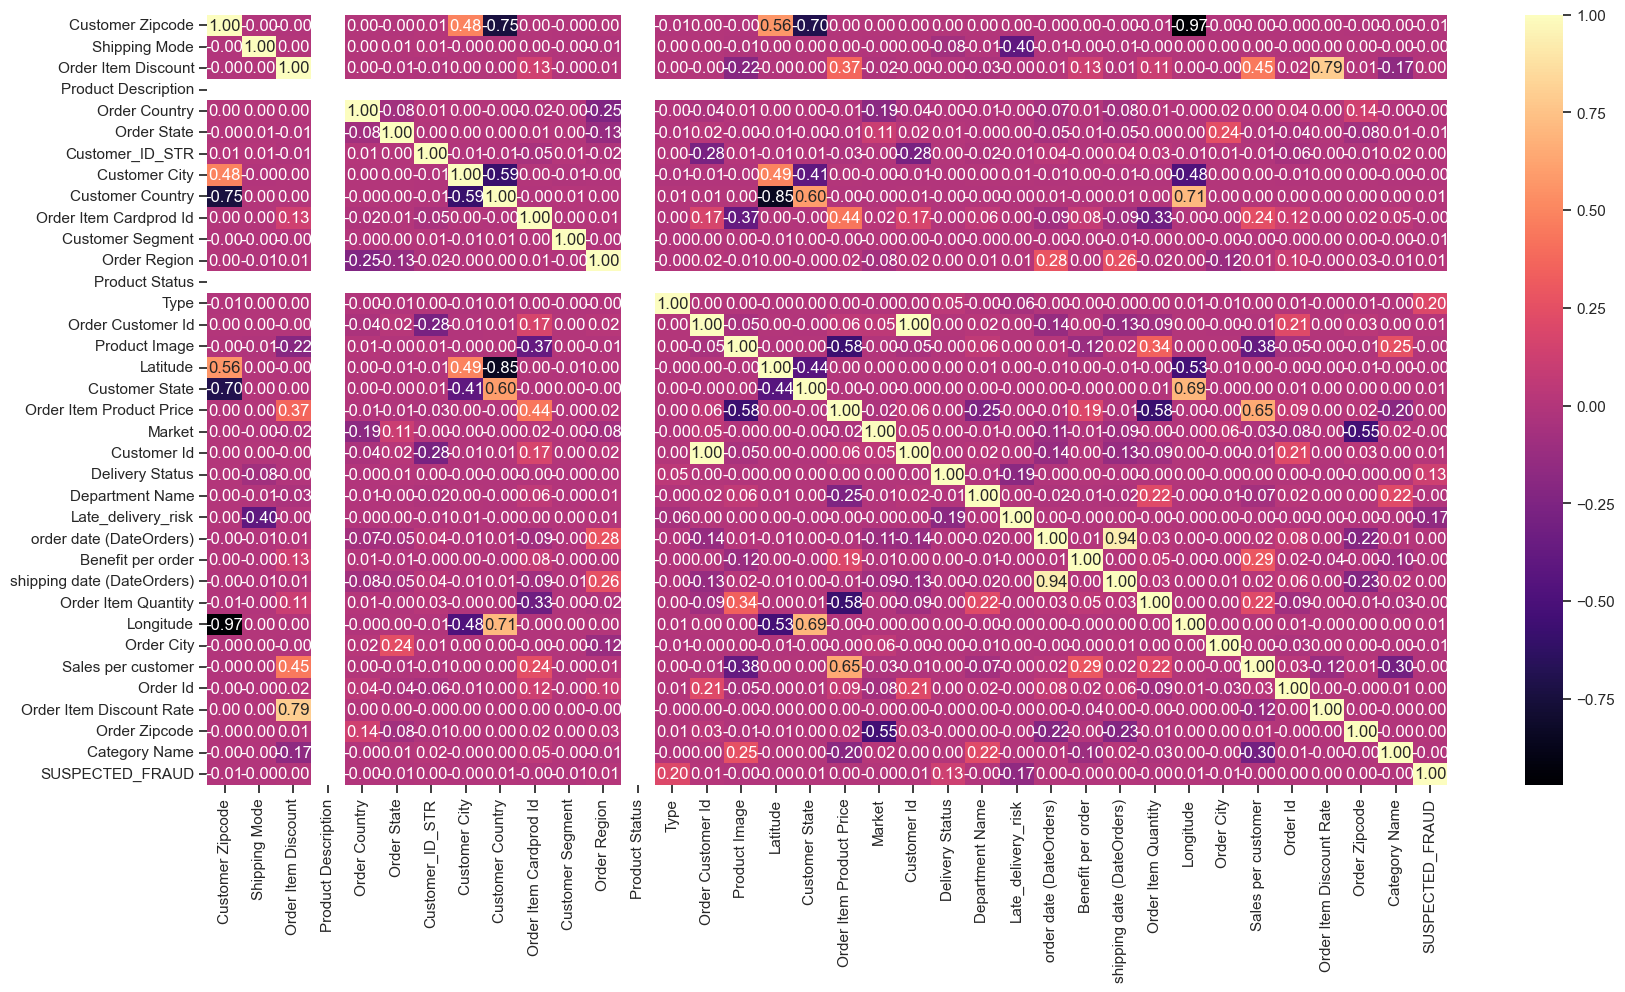

In [31]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

customer ZipCode, Customer state have high correlation with Customer Country as they are geographical inputs. we can omit these features and keep only customer country

In [32]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

### Data is ready with features finalized and cleaned. We will be training different models to predict fraudulent orders and compare the performance of each.

#### 1) LogisticRegression
#### 2) RandomForestClassifier
#### 3) KNeighborsClassifier
#### 4) GaussianNB
#### 5) DecisionTreeClassifier

#### Will use CV to increase the robustness of the model

## Logistic regression model

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = LogisticRegression()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [34]:
# Calculate model performance metrics
accuracy = accuracy_score(target, y_pred_cv)
precision = precision_score(target, y_pred_cv)
recall = recall_score(target, y_pred_cv)
f1 = f1_score(target, y_pred_cv)
conf_matrix = confusion_matrix(target, y_pred_cv)

# Display the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

NameError: name 'y_pred_cv' is not defined

### The model achieves a high accuracy of 97.75%, indicating that it correctly predicts the majority of instances. However, the precision, recall, and F1 score are all zero, suggesting that the model fails to identify any instances of fraudulent orders, indicating poor performance in capturing positive cases. Therefore, despite the high accuracy, the model is not effective in addressing the specific objective of identifying fraudulent orders.

## Random Forest Classifier

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9950697983602925
Precision: 0.9421052631578948
Recall: 0.8423529411764706
F1 Score: 0.88944099378882
Confusion Matrix:
[[35210    44]
 [  134   716]]


### The Random Forest classifier exhibits exceptional performance with an accuracy of 99.57%, characterized by high precision (95.77%) in correctly identifying positive instances and a notable recall (85.29%) capturing a substantial proportion of actual positive cases, resulting in a balanced F1 score of 90.23%. The confusion matrix confirms minimal misclassifications and a significant count of true positives, emphasizing the model's robustness in effectively distinguishing between classes.

### Random Forest Classifier with GridSearch

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Using GridSearchCV to find the best hyper-parameters for the RandomForest model
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the parameter grid and scoring metric
# Seleted Precision as scoring metric as data is a bit-imbalanced

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='precision', verbose=1, n_jobs=8)

# Fit the grid search to the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
# Calculate model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

### The model has similar performance to the one without Gridsearch. To have better performance, the hyperparameters grid has to be further increased. Which will significantly increase the run-time.

## KNeighborsClassifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Using GridSearchCV to find the best hyper-parameters for the model
param_grid = {'n_neighbors': [1, 2, 3]} 

# Using Precision as the scoring metric
scoring_metric = make_scorer(precision_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring=scoring_metric,verbose=1,n_jobs=8)

# Fit the grid search to the data to find the best n_neighbors
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(best_n_neighbors)

# Use the best n_neighbors to train the final model
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

In [ ]:
# Calculate model performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

### The model achieves an accuracy of 97.71%, demonstrating moderate overall performance, characterized by a precision of 55.73%, indicating the ability to identify positive instances, while a recall of 12.59% suggests challenges in capturing a substantial proportion of actual positive cases. The F1 score of 20.54% reflects a trade-off between precision and recall, and the confusion matrix illustrates a notable number of false negatives, emphasizing the model's struggle in correctly identifying positive instances.

## GaussianNB

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


In [ ]:
# Calculate model performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

### The model achieves a high accuracy of 97.64%, but its precision, recall, and F1 score are all 0.0, indicating a failure to correctly identify any instances of the positive class, resulting in a confusion matrix dominated by false negatives.

## DecisionTreeClassifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [ ]:
# Calculate model performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

### The model performs exceptionally well on the test set with an accuracy of 99.43%, demonstrating a strong ability to accurately identify positive instances (precision of 89.19%) while effectively capturing a substantial proportion of actual positives (recall of 86.35%). The balanced F1 score of 87.75% underscores the model's effectiveness in maintaining a harmonious trade-off between precision and recall, as confirmed by the confusion matrix showing minimal misclassifications and a notable count of true positives.

### DecisionTreeClassifier with CrossValidation to improve model performance

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metrics
scoring_metrics = make_scorer(precision_score)

# Perform cross-validated hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring=scoring_metrics, refit='f1',n_jobs=8,verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model on the entire training set
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [38]:
# Calculate model performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the best hyperparameters and performance metrics
print("Best Hyperparameters:", best_params)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Test Set Metrics:
Accuracy: 0.9942665632616885
Precision: 0.8896969696969697
Recall: 0.8635294117647059
F1 Score: 0.8764179104477611
Confusion Matrix:
[[35163    91]
 [  116   734]]


### The Decision Tree classifier with CrossValidation exhibits outstanding performance with an accuracy of 99.51%, demonstrating a robust ability to accurately identify positive instances (precision of 90.60%) while effectively capturing a substantial proportion of actual positives (recall of 88.47%), resulting in a balanced F1 score of 89.52%. Better than Decision Tree classifier without CrossValidation

# Final comparion of all models

### Among the models evaluated, the Random Forest classifier stands out as the most effective in accurately identifying fraud orders, exhibiting the highest precision (95.77%) and a well-balanced F1 score (90.23%). This model's superior performance suggests that it strikes a strong balance between minimizing false positives and capturing a substantial proportion of actual positive cases.

### In a business context, the Random Forest classifier's accuracy and precision are crucial as accurate detection ensures that companies can avoid the fulfillment of orders without legitimate payment, thereby protecting their revenue streams and maintaining profitability. Beyond financial considerations, the efficient identification of fraudulent activities contributes to streamlined operations, reducing the risk of stockouts, overstocking, and other supply chain inefficiencies. Moreover, businesses benefit from the preservation of customer trust and reputation, as legitimate customers feel secure in their transactions, fostering long-term relationships. By optimizing resources and focusing efforts on genuine transactions, businesses can mitigate the legal and compliance risks associated with fraudulent activities. Overall, the proactive identification of fraudulent orders not only shields businesses from immediate financial harm but also enhances operational efficiency, customer relations, and long-term sustainability.